<a href="https://www.kaggle.com/code/pranal17/the-ratings-game-insights-from-imdb-top-250-shows?scriptVersionId=214879337" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# IMDB Top 250 TV Shows

## Table of Contents


* [Introduction](#Introduction)
* [Data Loading](#Data-Loading)
* [Data Transformation](#Data-Transformation)
* [EDA (Exploratory Data Analysis)](#EDA-(Exploratory-Data-Analysis))
* [Conclusion](#Conclusion)


### Introduction

The IMDB Top 250 TV Shows dataset offers a captivating glimpse into the world of the most highly acclaimed television series, rated by audiences globally. This dataset provides a unique opportunity to analyze trends in TV show ratings, release years, episode counts, and audience engagement. Through this notebook, we will explore the data to uncover patterns and insights that highlight what makes these shows stand out among the best. From iconic titles to audience preferences, this analysis aims to delve into the characteristics that define these top-rated series.

### Data Loading

Reading the csv file and checking the data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'/kaggle/input/imdb-top-250-tv-shows/imdb_Top_250_TV_Shows.csv')
df

,Shows Name,Release Year,Episodes,Rating,Rating given by people
0,Breaking Bad,2008–2013,62 eps,9.5,(2.2M)
1,Planet Earth II,2016,6 eps,9.5,(163K)
2,Planet Earth,2006,11 eps,9.4,(224K)
3,Band of Brothers,2001,10 eps,9.4,(547K)
4,Chernobyl,2019,5 eps,9.3,(912K)
...,...,...,...,...,...
245,Umbre,2014–2019,21 eps,8.7,(12K)
246,Foyle's War,2002–2015,28 eps,8.6,(19K)
247,Gintama,2005–2021,375 eps,8.7,(17K)
248,The Great British Baking Show,2010–,189 eps,8.6,(13K)


In [3]:
df.head()

,Shows Name,Release Year,Episodes,Rating,Rating given by people
0,Breaking Bad,2008–2013,62 eps,9.5,(2.2M)
1,Planet Earth II,2016,6 eps,9.5,(163K)
2,Planet Earth,2006,11 eps,9.4,(224K)
3,Band of Brothers,2001,10 eps,9.4,(547K)
4,Chernobyl,2019,5 eps,9.3,(912K)


In [4]:
#Checking the unique values in each column 

for item in df:
    print(item, "- ")
    print(df[item].unique())
    print()

Shows Name - 
['Breaking Bad' 'Planet Earth II' 'Planet Earth' 'Band of Brothers'
 'Chernobyl' 'The Wire' 'Avatar: The Last Airbender' 'Blue Planet II'
 'The Sopranos' 'Cosmos: A Spacetime Odyssey' 'Cosmos' 'Our Planet'
 'Game of Thrones' 'Bluey' 'The World at War'
 'Fullmetal Alchemist: Brotherhood' 'Rick and Morty' 'Life'
 'The Last Dance' 'The Twilight Zone' 'The Vietnam War' 'Sherlock'
 'Attack on Titan' 'Batman: The Animated Series' 'Arcane'
 'Better Call Saul' 'The Office' 'The Blue Planet' "Clarkson's Farm"
 'Scam 1992: The Harshad Mehta Story' 'Human Planet' 'Frozen Planet'
 'Hunter x Hunter' 'Firefly' 'Only Fools and Horses' 'Death Note'
 'The Civil War' 'Gravity Falls' 'Seinfeld' 'Dekalog'
 'The Beatles: Get Back' 'Cowboy Bebop' 'True Detective' 'Fargo' 'Persona'
 'Nathan for You' 'As If' 'Apocalypse: The Second World War' 'Taskmaster'
 'When They See Us' 'Africa' 'Last Week Tonight with John Oliver'
 'Friends' 'Succession' "It's Always Sunny in Philadelphia" 'TVF Pitchers'
 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Shows Name              250 non-null    object 
 1   Release Year            250 non-null    object 
 2   Episodes                250 non-null    object 
 3   Rating                  250 non-null    float64
 4   Rating given by people  250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


### Data Transformation

In [6]:
df.isnull().sum()

Shows Name                0
Release Year              0
Episodes                  0
Rating                    0
Rating given by people    0
dtype: int64

In [7]:
#Cleaning release year data and divide it in start and completed year -
df['start_year'] = None
df['end_year'] = None

# Iterate over the rows and split the 'Release Year' column
for index, row in df.iterrows():
    
    item = row['Release Year'].split('–')
    
    if len(item) > 1:
        df.at[index, 'start_year'] = item[0]
        df.at[index, 'end_year'] = item[1]
        
    else:
        df.at[index, 'start_year'] = item[0]


df['end_year'] = df['end_year'].replace('',None)

In [8]:
#Cleaning episodes column and converting the datatype
df['Episodes'] = df['Episodes'].str.replace(' eps','').astype('int')

In [9]:
#Cleaning ratings column
ratings = []

df['Rating given by people'] = df['Rating given by people'].str.replace('(','').str.replace(')','')

for item in df['Rating given by people']:
    try:
        # Check if the item contains 'K'
        if 'K' in str(item):
            # Replace 'K', convert to float and multiply by 1000
            ratings.append(float(item.replace('K', '')) * 1000)
            
        # Check if the item contains 'M'
        elif 'M' in str(item):
            # Replace 'K', convert to float and multiply by 100000
            ratings.append(float(item.replace('M', '')) * 1000000)
            
        else:
            # Convert to float directly if no 'K' is present
            ratings.append(float(item))
            
    except ValueError:
        # Append None if conversion fails
        ratings.append(None)

# Assign the cleaned ratings back to the DataFrame
df['Rating given by people'] = ratings


In [10]:
#Droping unnecessary columns
df.drop(['Release Year'],axis=1,inplace=True)

### EDA (Exploratory Data Analysis)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Episodes,250.0,73.2600,115.693996,2.0,16.0,36.0,78.0,1137.0
Rating,250.0,8.7564,0.223650,8.5,8.6,8.7,8.9,9.5
Rating given by people,250.0,181044.0000,281480.384559,11000.0,35000.0,82000.0,209500.0,2400000.0


In [12]:
# Top 10 - most episodes TV Shows
df.sort_values(by='Episodes',ascending=False)[:10].reset_index().drop('index',axis=1).loc[:,['Shows Name','Episodes']]

,Shows Name,Episodes
0,One Piece,1137
1,The Simpsons,778
2,Naruto: Shippuden,501
3,Critical Role,432
4,Gintama,375
5,Last Week Tonight with John Oliver,372
6,El Chavo del Ocho,357
7,QI,350
8,Top Gear,328
9,South Park,327


In [13]:
# Top 10 - most Rated TV Shows
df.sort_values(by='Rating',ascending=False)[:10].reset_index().drop('index',axis=1).loc[:,['Shows Name','Rating']]

,Shows Name,Rating
0,Breaking Bad,9.5
1,Planet Earth II,9.5
2,Planet Earth,9.4
3,Band of Brothers,9.4
4,Bluey,9.3
5,Chernobyl,9.3
6,The Wire,9.3
7,Avatar: The Last Airbender,9.3
8,Blue Planet II,9.3
9,Cosmos,9.3


In [14]:
# Top 10 - most watched TV Shows by user based on rating given by people
df.sort_values(by='Rating given by people',ascending=False)[:10].reset_index().drop('index',axis=1).loc[:,['Shows Name','Rating given by people']]

,Shows Name,Rating given by people
0,Game of Thrones,2400000.0
1,Breaking Bad,2200000.0
2,Stranger Things,1400000.0
3,Friends,1100000.0
4,Sherlock,1000000.0
5,Chernobyl,912000.0
6,Dexter,807000.0
7,The Office,749000.0
8,The Boys,740000.0
9,Better Call Saul,695000.0


In [15]:
# Disesteemed TV Show as per rating and watched by people
df.sort_values(by=['Rating','Rating given by people'])[:10].reset_index().drop('index',axis=1).loc[:,['Shows Name','Rating','Rating given by people']]

,Shows Name,Rating,Rating given by people
0,Your Lie in April,8.5,41000.0
1,Whose Line Is It Anyway?,8.5,47000.0
2,Coupling,8.5,49000.0
3,Mob Psycho 100,8.5,51000.0
4,Justice League,8.5,53000.0
5,Trailer Park Boys,8.5,53000.0
6,Formula 1: Drive to Survive,8.5,53000.0
7,Samurai Champloo,8.5,58000.0
8,Spaced,8.5,59000.0
9,Samurai Jack,8.5,62000.0


In [16]:
# Top 10 years in as per the release - 
df.groupby('start_year').size().reset_index(name='Count').sort_values(by='Count',ascending=False)[:10].reset_index().drop('index',axis=1)

,start_year,Count
0,2019,15
1,2015,15
2,2014,13
3,2010,12
4,2011,11
5,2018,11
6,2004,10
7,2021,9
8,2017,9
9,2016,9


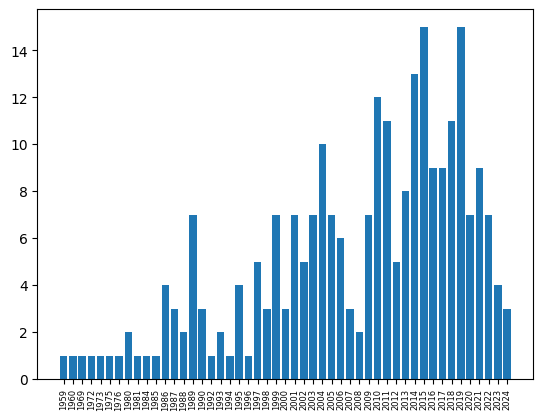

In [17]:
#Graphical representation of above cell most release as per year
data = pd.DataFrame(df.groupby('start_year')['Rating'].count()).reset_index()
plt.bar(data['start_year'],data['Rating'])
plt.xticks(rotation=90,fontsize=6)
plt.show()

    Rating  Count
0      8.5     38
1      8.6     60
2      8.7     59
3      8.8     23
4      8.9     18
5      9.0     24
6      9.1     10
7      9.2      8
8      9.3      6
9      9.4      2
10     9.5      2



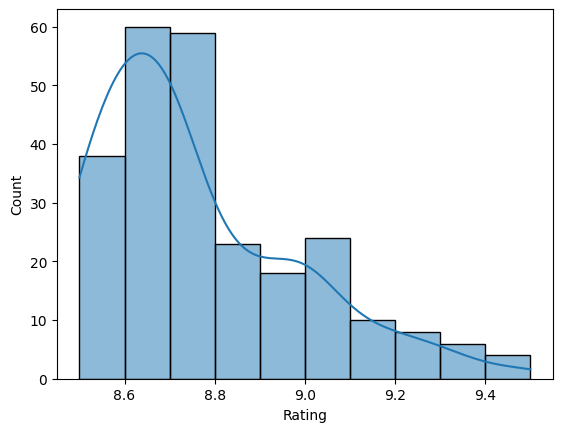

In [18]:
#Ratings distribution
print(df.groupby('Rating').size().reset_index(name='Count'))
print()
sns.histplot(df['Rating'],bins=10, kde=True)
plt.show()

### Conclusion 

Based on the EDA, the following insights can be drawn:

1. **Most Productive Years**: The years 2015 and 2019 witnessed the release of the highest number of top-rated TV shows, indicating a surge in high-quality content during these periods.

2. **Most Watched Web Series**: *Game of Thrones* and *Breaking Bad* stand out as the most viewed TV shows, reflecting their immense popularity and cultural impact on audiences worldwide.

3. **Top-Rated Series**: *Breaking Bad*, *Planet Earth II*, and *Planet Earth I* consistently emerge as the highest-rated series, showcasing exceptional storytelling, production quality, and audience satisfaction.

4. **Poorly Rated TV Shows**: Despite making it to the Top 250 list, a few TV shows received relatively low ratings, possibly due to subpar direction, weak storylines, or unmet audience expectations. These outliers provide an interesting contrast to the top-rated entries.

5. **The Unmatched Popularity of Breaking Bad**: Released in 2008, *Breaking Bad* remains a standout TV series, combining critical acclaim with massive audience approval. With an IMDb rating among the highest, over 1.9 million reviews, and a total of 62 episodes, it exemplifies a perfect blend of gripping storytelling, character development, and audience engagement.

6. **Diverse Content Landscape**: The dataset highlights a mix of genres and formats, ranging from short series with only a few episodes to extensive sagas like *One Piece*, reflecting the evolving preferences of global audiences.

These insights underline the factors that contribute to the success of a TV show, from release timing and ratings to audience engagement and the total episode count. The analysis not only celebrates the most iconic TV series but also provides a lens to evaluate their impact on viewers globally.

### Credits

This notebook was created by [Pranal Patil](https://www.kaggle.com/Pranal17).  
Feel free to connect with me on Kaggle and explore more of my work!